In [45]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import math as m
from math import sqrt
import sympy as sp
from sympy import collect, simplify, expand, fraction, latex
from IPython.display import display, Markdown, Math
import control as co
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
sp.init_printing(use_latex='mathjax')
plt.rcParams['figure.figsize'] = [20, 10]

In [46]:
class numden_coeff:
    def __init__(self, expr, symb):
        self.num, self.denum = fraction(expr)
        self.symb = symb
        self.common_factor = None
        self.lst_denum_coeff = self.build_lst(self.denum)
        self.lst_num_coeff = self.build_lst(self.num)
        
    def build_lst(self, poly):
        order = sp.Poly(poly, self.symb).degree()
        lst = [expand(poly).coeff(self.symb**i) for i in range((order), 0, -1)]
        lst.append(poly.subs(self.symb,0))
        if (self.common_factor == None):
            self.common_factor = lst[0]
            
        lst = [simplify(lst[i]/self.common_factor) for i in range(order + 1)]
        return lst
    
    def disp(self):
        display(Markdown(r"Numerator coefficients (\beta)"), self.lst_num_coeff)
        display(Markdown(r"Denominator coefficients (alpha)"), self.lst_denum_coeff)

In [47]:
def theta_hat_ploter(df, theta0, title, line_width=1.2):
    lst_color = ['b', 'y', 'g', 'r']
    lst_labels = df.columns
    graph = sns.lineplot(data=df, dashes=False)

    for i in range(len(theta0)):
        graph.axhline(y=theta0[i], color=lst_color[i], linestyle='--', linewidth=line_width, label=lst_labels[i])
        
    plt.title(title)
    plt.ylabel('Magnitude of "Theta_hat"')
    plt.xlabel('Time Stamps "t"')
    plt.legend(bbox_to_anchor=(1.05, 1), 
               loc=2, 
               borderaxespad=0, 
               labels=lst_labels, 
               fontsize='xx-large')
    plt.show()

# Problem 1

## Part 1

In [53]:
c, d= sp.symbols('c d')
s, zeta, omega = sp.symbols('s zeta omega')
r1, s0, s1, a0, t0 = sp.symbols('r_1 s_0 s_1 a_0 t_0')

a = 1
b = 1
G1 = b/(s + a)
G2 = c/(s+d)
G = collect(expand(G1*G2), s)
B, A = fraction(G)
B_minus = B

$G_1(s)G_2(s) = G(s) =\;$ {{G}}

Therefore

$B = \;${{B}}

$A = \;$ {{A}}

Since $Deg(B)$ is clearly $0$, $B^{+} = 1$ and $B^- =\;$ {{B}}

In [49]:
Am = s**2 + 2*s + 1
Bm = 1
Gm = Bm/Am
Bm_prime = Bm/B_minus

$A_m$ is given to be {{Am}}. Letting the desired model take the form of 

$G_m = \frac{\omega^2}{s^2 + 2\zeta\omega + \omega^2}$

$\omega$ and $\zeta$ are equivalent to $1$. Since $\omega = 1$, $B_m$ must be equal to $1$ which yeilds

$G_m =\;${{Gm}}

Additionally, $B_m^{'} =\frac{B_m}{B^-} =\;${{Bm_prime}}

In order for minimum phase to be achived, the following conditions on the degrees of the polynomials making up the system must be met and will ultimatley guide the desing,

$$Deg(A_0) = Deg(A) - Deg(B^+) - 1 = 2 - 0 - 1 = 1$$

$$Deg(A_c) = 2(Deg(A))-1 = 2*2 - 1 = 3$$

$$Deg(R) = Deg(S) = Deg(A_c) - Deg(A) = 3 - 2 = 1$$

In [50]:
A0 = s + a0
R_prime = s + r1
R = R_prime
S = s0*s + s1
T_ = A0*Bm_prime

Since $Deg(B^+) = 0$ then $Deg(R^{'}) = 1$ and therfore 

$R = B^{+}R^{'} = R^{'} =\;${{R_prime}} 

Additionally, considering the polynomial degrees derived above, we know that

$A_0 =\;${{A0}}

$S =\;${{S}}

Lastly,

$T =A_0B_{m}^{'}=\;${{T_}}

In [51]:
# derivation of diophantine equation
LHS = collect(expand(A*R_prime + B_minus*S), s)
RHS = collect(expand(A0*Am), s)
equ = sp.Eq(LHS,RHS)

# Derivation of control paramteters
r_1 = sp.solve(sp.Eq(LHS.coeff(s**2),RHS.coeff(s**2)), r1)[0]
s_0 = sp.solve(sp.Eq(LHS.coeff(s**1),RHS.coeff(s**1)), s0)[0]
s_1 = sp.solve(sp.Eq(LHS.subs(s,0),RHS.subs(s,0)), s1)[0]

In [52]:
display((A*R_prime + B_minus*S))
display(A0*Am)

                         ⎛     2            ⎞
c⋅(s⋅s₀ + s₁) + (r₁ + s)⋅⎝d + s  + s⋅(d + 1)⎠

         ⎛ 2          ⎞
(a₀ + s)⋅⎝s  + 2⋅s + 1⎠

The Diophantine equation in terms of control parameters is given by

$AR^{'} + B^{-}S = A_0A_m$

$ \Rightarrow\;${{LHS}}$=${{RHS}}

Grouping the coefficients of the same ordered $s$ terms and solving for the control parameters yeilds

$r_1 =${{r_1}}

$s_0 =${{s_0}}

$s_1 =${{s_1}}

## Part 2

### ODE of Plant

In [9]:
B.subs(s,0)

c

In [10]:
y_s, u_s = sp.symbols('y(s) u(s)')
display(A)

ode_RHS = ((-A.coeff(s**1)*s - A.subs(s,0))*y_s) + (B.coeff(s**2)*s**2 + B.coeff(s**1)*s**1 + B.subs(s,0))*u_s
ode_RHS

     2            
d + s  + s⋅(d + 1)

c⋅u(s) + y(s)⋅(-d + s⋅(-d - 1))

The ODE of $2^{nd}$ order describing the process is given by

$s^2y(s) = -(d + 1)sy(s) - dy(s) + cu(s)$

where $p$ is the time shifting operator. The reliance of the RHS of the equation on derivatives can be changed to integrals by filtering the input ($u(s)$) and output ($y(s)$) of the plant by a filter whose denominator polynomial is greater order than the derivative. The above equation becomes 

$s^2y_f(s) = -(d + 1)sy_f(s) - dy_f(s) + cu_f(s)$ 

$\Rightarrow s^2H_fy(s) = -(d + 1)sH_fy(s) - dH_fy(s) + cH_fu(s)$

$\Rightarrow \frac{s^2}{A_m}y(s) = -(d + 1)\frac{s}{A_m}y(s) - d\frac{1}{A_m}y(s) + c\frac{1}{A_m}u(s)$

For simplicity, let $(d + 1) = x$. The ODE then becomes 

$\Rightarrow \frac{s^2}{A_m}y(s) = -x\frac{s}{A_m}y(s) - d\frac{1}{A_m}y(s) + c\frac{1}{A_m}u(s)$

This equation can be further simplified as

$\Rightarrow y_2(s) = -xy_1(s) - dy_0(s) + cu_0(s)$ 



### Bilinear Transformation of Filtered ODE

In [11]:
H_f = 1/Am

The filter $H_f(s)$ is given to be

$H_f(s)= \frac{1}{A_m}=\;$ {{H_f}}

This filter ,and the ODE above, are however, in terms of $s$ and are therfore, in continuous time domain. To converte the filter to discrete time ($q$), a bilinear transformation will be performed. i.e.

$s\rightarrow\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}$


The ODE can now be represented in the discret time domain by

$y_i(kT) = H_i(q^{-1})y(kT) = \frac{s^i}{A_m(s)}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}}y(kT), \;\;\;  u_i(kT)  = \frac{s^i}{A_m(s)}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}}u(kT)$


In [12]:
T, q = sp.symbols('T q')

bilinear_T = (2/T)*((1 - q**(-1))/(1 + q**(-1)))

H_fy2 = collect(simplify(expand(((s**2)*H_f).subs(s,bilinear_T))), q)
H_fy1 = collect(simplify(expand((s*H_f).subs(s,bilinear_T))), q)
H_fy0 = collect(simplify(expand((H_f).subs(s,bilinear_T))), q)
H_fu0 = collect(simplify(expand((H_f).subs(s,bilinear_T))), q)

obj_H_fy2 = numden_coeff(H_fy2, q)
obj_H_fy1 = numden_coeff(H_fy1, q)
obj_H_fy0 = numden_coeff(H_fy0, q)
obj_H_fu0 = numden_coeff(H_fu0, q)


aH_fy2 = obj_H_fy2.lst_denum_coeff
bH_fy2 = obj_H_fy2.lst_num_coeff
aH_fy1 = obj_H_fy1.lst_denum_coeff
bH_fy1 = obj_H_fy1.lst_num_coeff
aH_fy0 = obj_H_fy0.lst_denum_coeff
bH_fy0 = obj_H_fy0.lst_num_coeff
aH_fu0 = obj_H_fu0.lst_denum_coeff
bH_fu0 = obj_H_fu0.lst_num_coeff

For $H_1(q^{-1})y(kT)$, the coefficients of the denominator $\alpha y_1$ are

$\alpha y_1 = \;${{aH_fy1}}

(ordered by powers of $q$ going from $q^0$ to $q^-2$) and the coefficients of the numerator $\beta y_1$ are

$\beta y_1 = \;${{bH_fy1}}

which are also ordered by powers of $q$ going from $q^0$ to $q^-2$. Similarly, the coefficients for the denominator ($\alpha$) and numerator ($\beta$) of $y_0$ and $u_0$ are

$\alpha y_0 = \;${{aH_fy0}}

$\beta y_0 = \;${{bH_fy0}}

$\alpha u_0 = \;${{aH_fu0}}

$\beta u_0 = \;${{bH_fu0}}

Note that $\alpha y_0 = \alpha u_0$ and $\beta y_0 = \beta u_0$ 

$\alpha y_2 = \;${{aH_fy2}}

$\beta y_2 = \;${{bH_fy2}}

In [13]:
y_k, y_k_1, y_k_2  = sp.symbols('y(k) y(k-1) y(k-2)')
u_k, u_k_1, u_k_2  = sp.symbols('u(k) u(k-1) u(k-2)')
y1_k_1, y1_k_2 = sp.symbols('y_{1}(k-1) y_{1}(k-2)')
y0_k_1, y0_k_2 = sp.symbols('y_{0}(k-1) y_{0}(k-2)')
u0_k_1, u0_k_2 = sp.symbols('u_{0}(k-1) u_{0}(k-2)')

y1_k = -y1_k_1*aH_fy1[1] - y1_k_2*aH_fy1[2] + y_k*bH_fy1[0] + y_k_2*bH_fy1[2]
y0_k = -y0_k_1*aH_fy0[1] - y0_k_2*aH_fy0[2] + y_k*bH_fy0[0] + y_k_1*bH_fy0[1] + y_k_2*bH_fy0[2]
u0_k = -u0_k_1*aH_fu0[1] - u0_k_2*aH_fu0[2] + u_k*bH_fu0[0] + u_k_1*bH_fu0[1] + u_k_2*bH_fu0[2]

In [14]:
aH_fy2[2]

 2          
T  - 4⋅T + 4
────────────
 2          
T  + 4⋅T + 4

In [15]:
y2_k, y2_k_1, y2_k_2 = sp.symbols('y_{2}(k) y_{2}(k-1) y_{2}(k-2)')

equ = sp.Eq(y2_k, -y2_k_1*aH_fy2[1] - y2_k_2*aH_fy2[2] + y_k*bH_fy2[0] + y_k_1*bH_fy2[1] + y_k_2*bH_fy2[2])
yk = sp.solve(equ, y_k)[0]
yk

 2             2               2                                              
T ⋅y_{2}(k)   T ⋅y_{2}(k-1)   T ⋅y_{2}(k-2)                                   
─────────── + ───────────── + ───────────── + T⋅y_{2}(k) - T⋅y_{2}(k-2) + 2⋅y(
     4              2               4                                         

                                                    
                                                    
k-1) - y(k-2) + y_{2}(k) - 2⋅y_{2}(k-1) + y_{2}(k-2)
                                                    

The difference equations for $y_i(kT)$ and $u_i(kT)$ are

$y_1(kT) = \;$ {{y1_k}}

$y_0(kT) = \;$ {{y0_k}}

$u_0(kT) = \;$ {{u0_k}}

Therefore,

$y_2(kT) = [-y_1(kT) \; -y_0(kT) \; u_0(kT)][x \; d \; c]^T = \phi^T\theta$

### Bilinear Transformation of Control Signal u(t)

In [16]:
T_R = simplify(T_/R)
S_R = simplify(S/R)

T_subd = T_
R_subd = R.subs(r1, r_1)
S_subd = collect(expand(S.subs([(s0,s_0), (s1,s_1), (r1, r_1)])), s)

T_R_subd = T_subd/R_subd
S_R_subd = simplify(S_subd/R_subd)

# # bilinear transformation of T/R and S/R in terms of plant params
# TR = collect(simplify(expand(T_R_subd.subs(s, bilinear_T))), q)
# SR = collect(simplify(expand(S_R_subd.subs(s, bilinear_T))), q)

# bilinear transformation of T/R and S/R in terms of control params
TR = collect(simplify(expand(T_R.subs(s, bilinear_T))), q)
SR = collect(simplify(expand(S_R.subs(s, bilinear_T))), q)

The control signal of the system is given by 

$u(t) = \frac{T}{R}u_c(t) - \frac{S}{R}y(t)$

$u(t) =\;${{T_R}}$u_c(t) -\;${{S_R}}$y(t)$ 

$u(t) =\;${{T_R_subd}}$u_c(t) -\;${{S_R_subd}}$y(t)$

This however, must also be converted to the discrete time doamin with a bilinear transformation as well. This will be done by directly performing the transformation on $\frac{T}{R}$ and $\frac{S}{R}$ (no filtering) and using the $\alpha$ and $\beta$ coefficients to derive difference equations for $u_c(kT)$ and $y(kT)$ respectivley. 

The bilinear transformations of $\frac{T}{R}$ and $\frac{S}{R}$ are

$\frac{T}{R}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}} = \;${{TR}}

$\frac{S}{R}\bigg\rvert_{s=\frac{2(1 - \frac{1}{q})}{T(1 + \frac{1}{q})}} = \;${{SR}}

In [17]:
obj_TR = numden_coeff(TR, q)
obj_SR = numden_coeff(SR, q)

aTR = obj_TR.lst_denum_coeff
bTR = obj_TR.lst_num_coeff

aSR = obj_SR.lst_denum_coeff
bSR = obj_SR.lst_num_coeff
R

r₁ + s

For $\frac{T}{R}$, the coefficients of the numerator and denominator are

$\alpha\frac{T}{R} =\;$ {{aTR}} 

and

$\beta\frac{T}{R} =\;$ {{bTR}}

while the coefficients of the numerator and denominator for $\frac{S}{R}$ are

$\alpha\frac{S}{R} =\;$ {{aSR}}

and

$\beta\frac{S}{R} =\;$ {{bSR}}

In [18]:
uc_k, uc_k_1 = sp.symbols('u_{c}(k) u_{c}(k-1)')

uk = -u_k_1*aTR[1] + uc_k*bTR[0] + uc_k_1*bTR[1] - y_k*bSR[0] - y_k_1*bSR[1]

The difference equation representing the control signal becomes

$u(k) = \;${{uk}}

### Bilinear Transformation of Control Signal $G(s)$

In [19]:
G_ = collect(simplify(expand(G.subs([(d,.5), (c,2)]))), q)
G_ = collect(simplify(expand(G_.subs(s, bilinear_T))), q)

obj_G_ = numden_coeff(G_, q)

aG_ = obj_G_.lst_denum_coeff
bG_ = obj_G_.lst_num_coeff

# yk = -y_k_1*aG_[1] - y_k_2*aG_[2] + u_k*bG_[0] + u_k_1*bG_[1] + u_k_2*bG_[2]

Performing a bilinear transformation on $G(s)$ yeilds

$G(kT) =\;${{G_}}

To which the coefficients of the numerator and denominator are

$\beta G(kT) = \;${{bG_}}

and 

$\alpha G(kT) = \;${{aG_}}

The difference equation representing the output of the plant is therefore given by

$y(k) =\;${{yk}}

## part 3

In [20]:
T_val = 0.1
a_0_val = 1

y1_k_ = y1_k.subs(T,T_val)
y0_k_ = y0_k.subs(T,T_val)
u0_k_ = u0_k.subs(T,T_val)
yk_ = yk.subs(T,T_val)
uk_ = uk.subs([(T,T_val),(s0, s_0), (s1, s_1), (r1 ,r_1), (a0, a_0_val)])

y1_k_func = sp.lambdify([y_k, y_k_2, y1_k_1, y1_k_2], y1_k_)
y0_k_func = sp.lambdify([y_k, y_k_1, y_k_2, y0_k_1, y0_k_2], y0_k_)
u0_k_func = sp.lambdify([u_k, u_k_1, u_k_2, u0_k_1, u0_k_2], u0_k_)
# yk_func = sp.lambdify([u_k, u_k_1, u_k_2, y_k_1, y_k_2, c, d], yk_)
yk_func = sp.lambdify([y2_k, y2_k_1, y2_k_2, y_k_1, y_k_2], yk_)
uk_func = sp.lambdify([u_k_1, uc_k, uc_k_1, y_k, y_k_1, c, d], uk_)

The for the implementation of the design, a sampling period of {{T_val}} ($T =\;${{T_val}}) and an observer polynomial parameter of {{a_0_val}} ($a_0 = \;${{a_0_val}}) will be used. The difference equations for $y_1(kT), y_0(kT), u_0(kT), u(kT)$ and $y(kT)$ become

$y_1(kT) = \;${{y1_k_}}

$y_0(kT) = \;${{y0_k_}}

$u_0(kT) = \;${{u0_k_}}

$y(kT) = \;${{yk_}}

$u(kT) = \;${{uk_}}

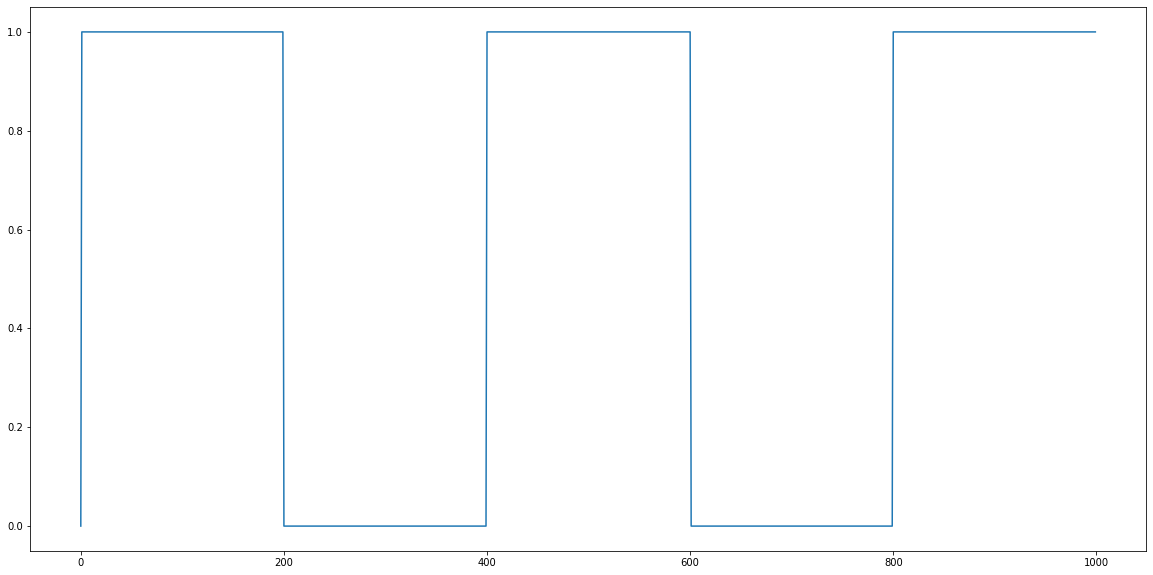

In [21]:
sample_depth = int(100/T_val)
sample_range = range(sample_depth)
t = [i for i in sample_range]

u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi*T_val/20)<=0 for i in sample_range])] = 0
plt.plot(u_c)

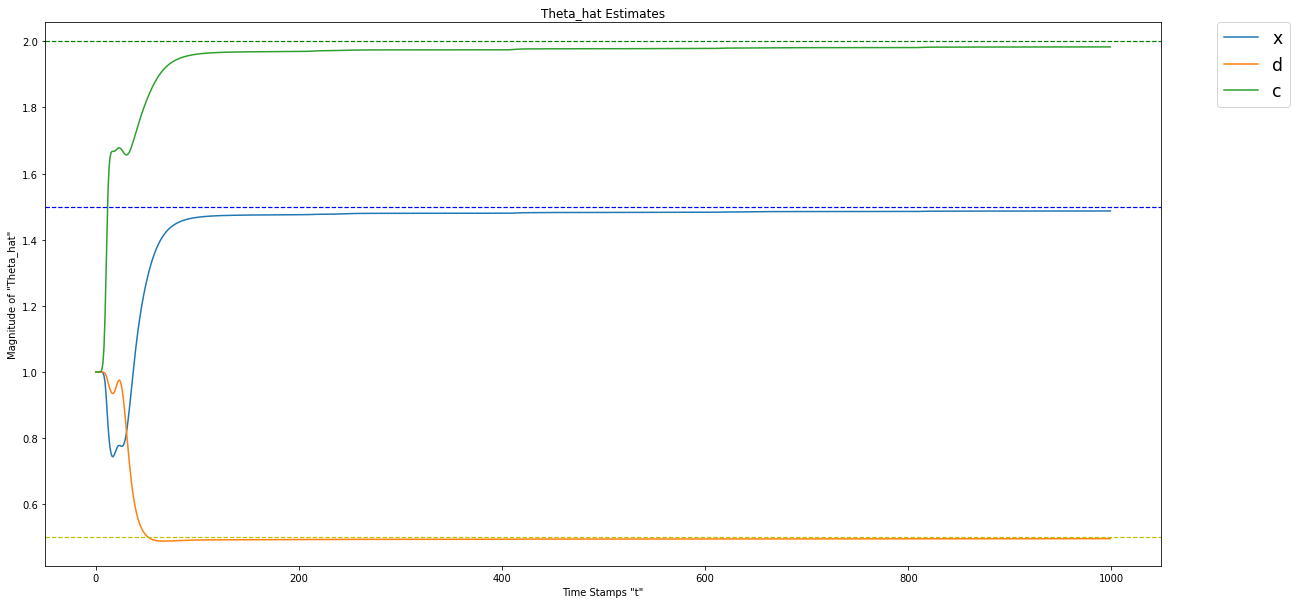

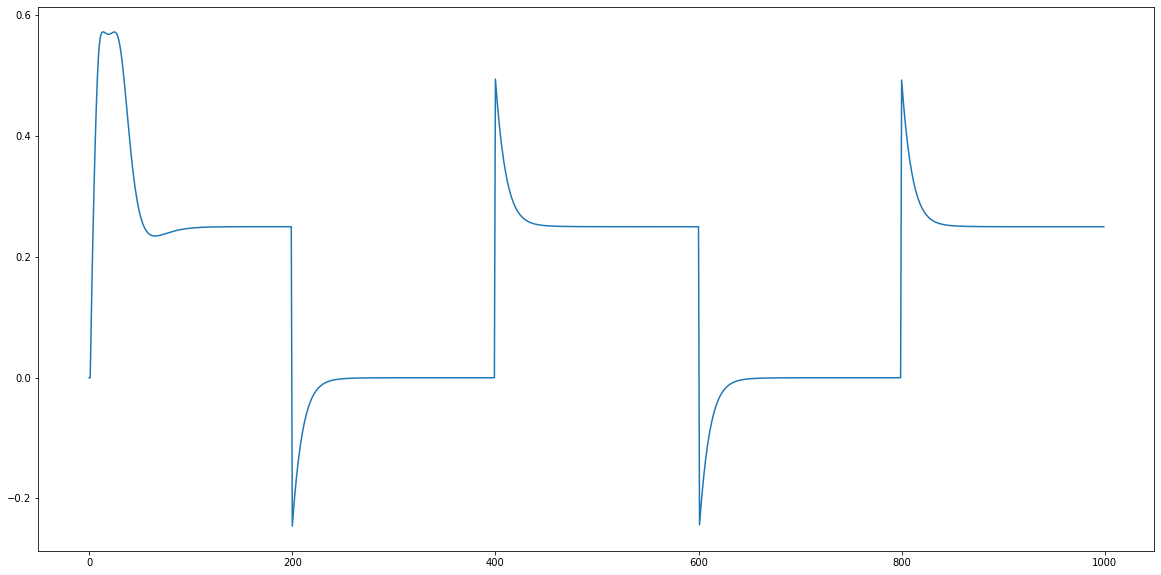

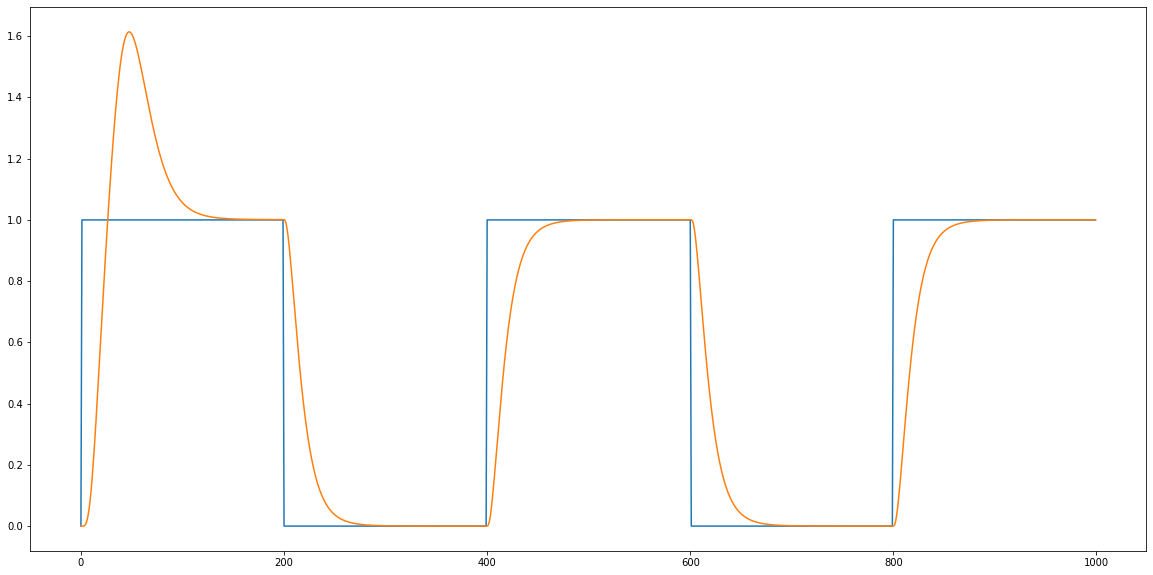

In [22]:
sample_depth = int(100/T_val)
sample_range = range(sample_depth)
starting_samples = 2

t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi*T_val/20)<=0 for i in sample_range])] = 0

c = 2
d = 0.5
x = d + 1

theta0 = np.array([x, d, c]).reshape(-1,1)
theta_hat = [np.array([1]*3).reshape(-1,1) for _ in range(starting_samples)]

y = [0]*starting_samples
u = [0]*starting_samples

y2 = [0]*starting_samples
y1 = [0]*starting_samples
y0 = [0]*starting_samples
u0 = [0]*starting_samples

lam = 0
I = np.identity(3)
p = 1000*I 
    
for k in range(2,sample_depth):
    phi = np.array([-y1[-1], -y0[-1], u0[-1]]).reshape(-1,1)
    
    theta_hat.append(theta_hat[-1] + T_val*(p@phi)*(phi.T@theta0 - phi.T@theta_hat[-1]))
    p = p + T_val*(lam*I - p@phi@phi.T)@p
    
    y2.append(np.reshape(phi.T@theta0, ()))
    
    y.append(np.reshape(yk_func(y2[k], y2[k-1], y2[k-2], y[k-1], y[k-2]), ()))
    u.append(np.reshape(uk_func(u[k-1], u_c[k], u_c[k-1], y[k], y[k-1], theta_hat[-1][2], theta_hat[-1][1]), ()))
    
    
    y1.append(np.reshape(y1_k_func(y[k], y[k-2], y1[k-1], y1[k-2]), ()))
    y0.append(np.reshape(y0_k_func(y[k], y[k-1], y[k-2], y0[k-1], y0[k-2]), ()))
    u0.append(np.reshape(u0_k_func(u[k], u[k-1], u[k-2], u0[k-1], u0[k-2]), ()))
    

df_theta = pd.DataFrame(np.asarray(theta_hat).reshape(-1,3,), columns=['x', 'd', 'c'])
theta_hat_ploter(df_theta, theta0, 'Theta_hat Estimates')
plt.plot(t,u)
plt.show()

plt.plot(t,u_c)
plt.plot(t,y)
plt.show()

In [23]:
# theta_hat[201]
# u_c[199]
np.shape(p)
theta_hat[-1]

array([[1.48675936],
       [0.4959153 ],
       [1.98290434]])

# Problem 2

## part 1

## part 2

In [24]:
a1, a2, b0, b1 = sp.symbols('a_{1} a_{2} b_{0} b_{1}')
am1, am2, bm0, bm1 = sp.symbols('a_{m1} a_{m2} b_{m0} b_{m1}')
s, q = sp.symbols('s q')
r1, s0, s1, a0 = sp.symbols('r_1 s_0 s_1 a_0')
t0 = sp.symbols('t_0')

A = q**2 + a1*q + a2
B = b0*q + b1

A_pol = sp.Poly(A)
B_pol = sp.Poly(B)

B_minus = b0
B_plus = simplify(B/B_minus)
H = B/A
H

  b_{0}⋅q + b_{1}   
────────────────────
                   2
a_{1}⋅q + a_{2} + q 

$B = B^{-}B^{+} = \;$({{B_minus}})({{B_plus}})

Therfore,

$$Deg(B^-) = 0$$

and 

$$Deg(B^+) = Deg(B) = Deg(B_m) = 1$$

Additionally

$$Deg(A) = Deg(A_m) = 2$$

$$Deg(S) = Deg(R) = Deg(A) - 1 = 2 - 1 = 1$$

$$Deg(R^{'}) = Deg(R) - Deg(B^+) = 1 - 1 = 0$$

$$Deg(A_0) = Deg(A) + Deg(R^{'}) - Deg(A_m) = 2 + 0 - 2 = 0$$

In [25]:
A0 = 1
S = s0*q + s1
R = q + r1
R_prime = 1
Am = q**2 + am1*q + am2
Bm = Am.subs(q,1)*q**B_pol.degree()
# T = simplify(A0*Bm/B_minus)
T = q*t0

The control polynomials become

$A_0 =\;${{A0}}

$S =\;${{S}}

$R =\;${{R}}

$R^{'} =\;${{R_prime}}

$A_m =\;${{Am}}

Additionally, to achive unity gain, the final value theorem can implemented on $A_m$ to obtain the value of $B_m$. This is achived by the equation $B_m = A_m(1)q^m$.This way, when k goes to infinity ($q \rightarrow 1$), $G_m = 1$ and $Deg(B_m) = Deg(B)$. Therfore,

$B_m =\;${{Bm}}

From this result, $T$ can be calculated

$T =\;${{T}} 

In [26]:
LHS_coeffs = sp.Poly(A*R_prime + B_minus*S, q).coeffs()[::-1]
RHS_coeffs = sp.Poly(A0*Am, q).coeffs()[::-1]

r_1 = b1/b0
s_0 = sp.solve(sp.Eq(LHS_coeffs[1], RHS_coeffs[1]), s0)[0]
s_1 = sp.solve(sp.Eq(LHS_coeffs[0], RHS_coeffs[0]), s1)[0]
t_0 = (am1 + am2 + 1)/b0

We can see that 

$r_1 = \;${{r_1}}

and

$t_0 =\;${{t_0}}

Solving the diophantine equation

 $AR^{'} + B^{-}S = A_0A_m \;\;\;\Rightarrow \;\;\;$ {{A}} $\;+\;${{B_minus}}{{S}}$\;=\;${{Am}}
 
 yeilds the following control paramters
 
 $s_0 =\;${{s_0}}
 
 $s_1 =\;${{s_1}}

In [27]:
S_ = S.subs([(s0, s_0), (s1, s_1)])
R_ = R.subs(r1, r_1)
T_ = T.subs(t0, t_0)

The control polynomials in terms of control parameters are

$R =\;${{R_}}

$S =\;${{S_}}

$T =\;${{T_}}

## Control equation

In [28]:
TR = simplify(T_/R_)
SR = simplify(S_/R_)

obj_TR = numden_coeff(TR, q)
obj_SR = numden_coeff(SR, q)

aTR = obj_TR.lst_denum_coeff
bTR = obj_TR.lst_num_coeff

aSR = obj_SR.lst_denum_coeff
bSR = obj_SR.lst_num_coeff

For $\frac{T}{R}$, the coefficients of the numerator and denominator are

$\alpha\frac{T}{R} =\;$ {{aTR}} 

and

$\beta\frac{T}{R} =\;$ {{bTR}}

while the coefficients of the numerator and denominator for $\frac{S}{R}$ are

$\alpha\frac{S}{R} =\;$ {{aSR}}

and

$\beta\frac{S}{R} =\;$ {{bSR}}

In [29]:
u_k, u_k_1, uc_k, y_k, y_k_1, y_k_2 = sp.symbols('u(k) u(k-1) u_{c}(k) y(k) y(k-1) y(k-2)')

uk = -u_k_1*aTR[1] + uc_k*bTR[0] - y_k*bSR[0] - y_k_1*bSR[1]
uk

  b_{1}⋅u(k-1)   u_{c}(k)⋅(a_{m1} + a_{m2} + 1)   y(k)⋅(-a_{1} + a_{m1})   y(k
- ──────────── + ────────────────────────────── - ────────────────────── - ───
     b_{0}                   b_{0}                        b_{0}               

-1)⋅(-a_{2} + a_{m2})
─────────────────────
      b_{0}          

In [30]:
co.sample_system(co.tf([1], [1, 2, 1]), Ts=2, method='zoh')

TransferFunction(array([0.59399415, 0.15365092]), array([ 1.        , -0.27067057,  0.01831564]), 2)

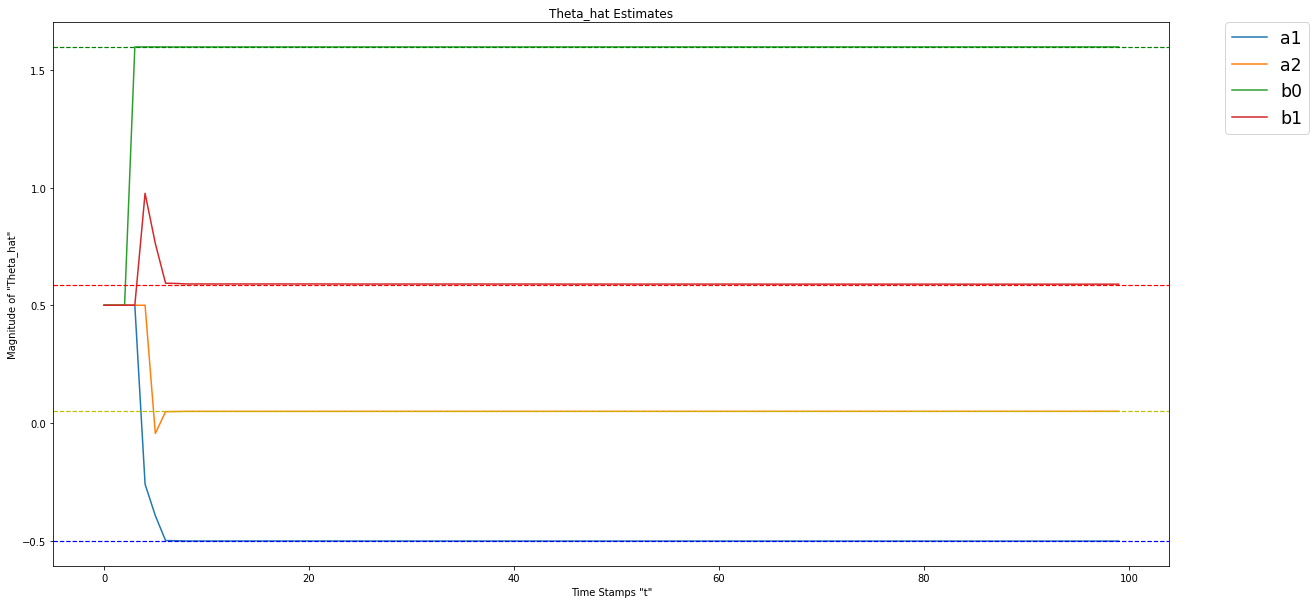

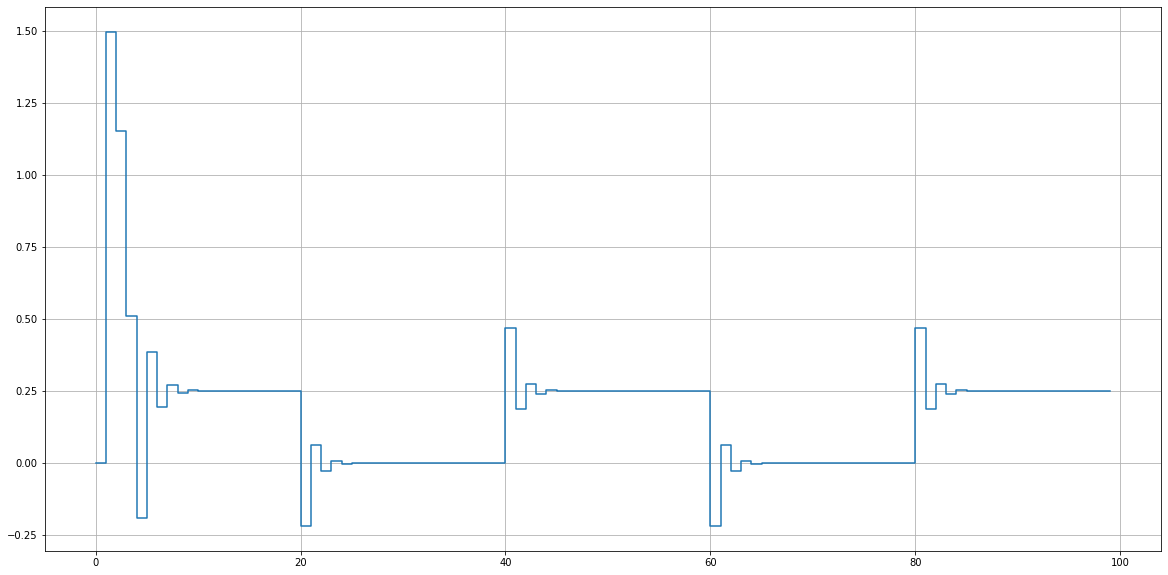

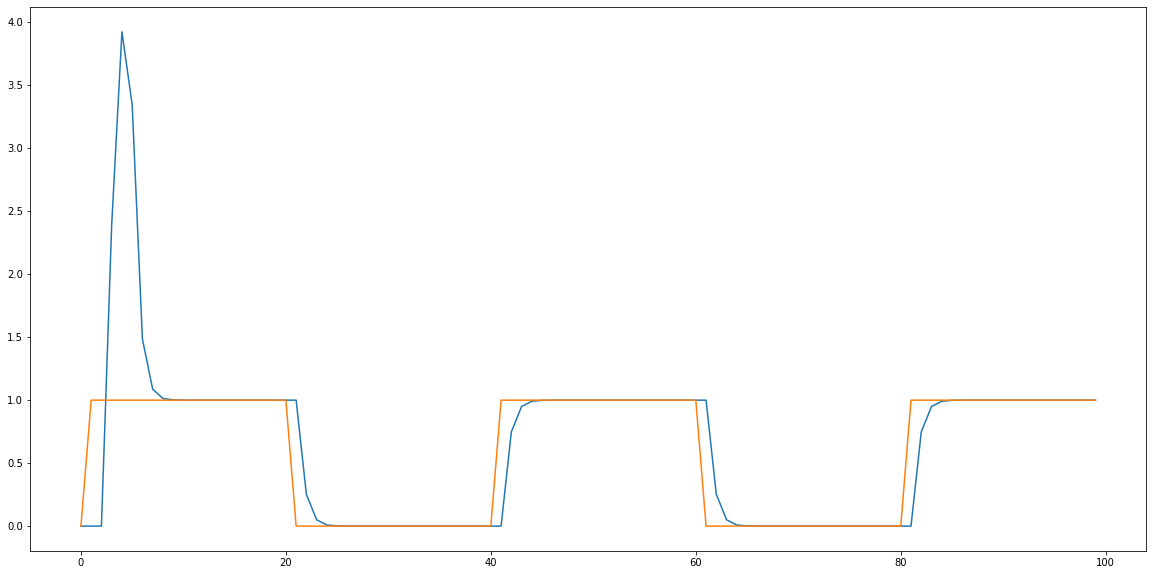

In [31]:
# Tunable components vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
sample_depth = 100
starting_samples = 2

# starting estimate for plant parameters
est = 0.5

lam = 1 # forgeting factor lambda

# true plant parameters
a_1 = -0.503215
a_2 = 0.0497871
b_0 = 1.59831
b_1 = 0.587984
theta0 = np.array([a_1, a_2, b_0, b_1]).reshape(-1,1)

# Tunable components ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

theta_hat = [np.array([est]*len(theta0)).reshape(-1,1) for _ in range(starting_samples)]

# model parameters
a_m1 = -0.2707
a_m2 = 0.01832

uk_subd = uk.subs([(am1, a_m1), (am2, a_m2)])
uk_func = sp.lambdify([u_k_1, uc_k, y_k, y_k_1, a1, a2, b0, b1], uk_subd)

sample_range = range(sample_depth)
t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi/20)<=0 for i in sample_range])] = 0

y = [0]*starting_samples
u = [0]*starting_samples

I = np.identity(len(theta0))
p = 1000*I 
    
for k in range(starting_samples ,sample_depth):
    phi = np.array([-y[-1], -y[-2], u[-1], u[-2]]).reshape(-1,1)
    
    y.append(np.reshape(phi.T@theta0, ()))
    K = p@phi@inv(lam + phi.T@p@phi)
    p = (I - K@phi.T)@p/lam
    theta_hat.append(theta_hat[-1] + K*(y[k] - phi.T@theta_hat[-1]))
      
    u.append(np.reshape(uk_func(u[k-1], u_c[k], y[k], y[k-1], 
                                theta_hat[-1][0], theta_hat[-1][1], 
                                theta_hat[-1][2], theta_hat[-1][3]), ()))
    
df_theta = pd.DataFrame(np.asarray(theta_hat).reshape(-1,4,), columns=['a1', 'a2', 'b0', 'b1'])

theta_hat_ploter(df_theta, theta0, 'Theta_hat Estimates')

plt.step(t, u)
plt.grid()
plt.show()
    
plt.plot(t, y)
plt.plot(t, u_c)


## Step 5

In [32]:
x0, y0, r01, s00, s01 = sp.symbols('x_0 y_0 r_{01} s_{00} s_{01}')

Ad = q - 1

R0 = q + r01
S0 = s00*q + s01
T = q*t0

X = q + x0
Y = y0

X_ = q
Y_ = (-X_*R0/B).subs(q,1)

R = collect(expand(X_*R0 + Y*B),q)
S = collect(expand(X_*S0 - Y*A), q)

b_0 = sp.solve(sp.Eq(Y_, y0), b0)[0]
r_01 = r_1
s_00 = s_0
s_01 = s_1

R_prime = simplify((R/Ad).subs(b0, b_0))

# display(B.subs(b0,1))
# display(b_0)
 
# display(sp.Poly(simplify(R.subs(b0, b_0)), q))
# display(sp.Poly(expand((q - 1)*(q - b1*y0)), q))
# display(simplify(R_prime.subs(b0, b_0)))

display(Math("Y = "+latex(Y_)))
display(Math("R = "+latex(R)))
display(Math("R^{'} = "+latex(R_prime)))
display(Math("S = "+latex(S)))
display(r_01)
display(s_00)
display(s_01)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

b_{1}
─────
b_{0}

-a_{1} + a_{m1}
───────────────
     b_{0}     

-a_{2} + a_{m2}
───────────────
     b_{0}     

In [33]:
# LHS_coeffs = sp.Poly(A*R_prime + B_minus*S, q).coeffs()
# RHS_coeffs = sp.Poly(A0*Am*, q).coeffs()

# display(LHS_coeffs)
# display(A0*Am*X_)

# s_0 = sp.solve(sp.Eq(LHS_coeffs[0], RHS_coeffs[0]), s0)[0]
# s_1 = sp.solve(sp.Eq(LHS_coeffs[1], RHS_coeffs[1]), s1)[0]
# s_2 = sp.solve(sp.Eq(LHS_coeffs[2], RHS_coeffs[2]), s1)[0]

In [34]:
# might not need this
# r_1 = R_prime.subs(q,0)
# R_prime = q + r1

# display(Math("R^{'} = "+latex(R_prime)))

$A_d(q)A(q)y(t) = A_d(q)B(q)(u(t) + v(q))$ 

$\Rightarrow q(1 - q^{-1})A(q)y(t) = q(1-q^{-1})B(q)(u(t) + v(t))$ 

$\Rightarrow (1 - q^{-1})A(q)y(t) = (1-q^{-1})B(q)(u(t) + v(t))$

$\Rightarrow A(q)y_f(t) = B(q)u_f(t) + e(t)$

$\Rightarrow\;$({{A}})$y_f(t) = \;$({{B}})$u_f(t) + e(t)$

In [35]:
# for Derek
display(Math("R = "+latex(simplify(R.subs([(y0, Y_), (r01, r_01)])))))
display(Math("S = "+latex(simplify(S.subs([(y0,Y_), (s00,s_00), (r01, r_01), (s01,s_01)])))))
display(Math("T = "+latex(simplify(T.subs(t0, t_0)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Therefore

$y_f(t+2) = -a_1y_f(t+1) - a_2y_f(t) + b_0u_f(t+1) + b_1u_f(t)\;\Rightarrow\; y_f(t) = -a_1y_f(t-1) - a_2y_f(t-2) + b_0u_f(t-1) + b_1u_f(t-2)$

This means that the measurment model is

$y_f(t) = \phi^T\theta = [-y_f(t-1)\; -y_f(t-2)\; u_f(t-1)\; u_f(t-2)\;][a_1 \;a_2 \;b_0 \;b_1]^T$

We know that 

$y_f(t) = A_d(q^{-1})y(t)\;\Rightarrow\;y_f(t) = \; (1 - q^{-1})y(t)\;\Rightarrow\; y_f(t) = y(t) - y(t-1)$

Similarly

$u_f(t) = A_d(q^{-1})u(t)\;\Rightarrow\;u_f(t) = u(t) - u(t-1)$

## Control Equation

In [36]:
TR = simplify(T/R)
SR = simplify(S/R)

display(TR)

obj_TR = numden_coeff(TR, q)
obj_SR = numden_coeff(SR, q)

aTR = obj_TR.lst_denum_coeff
bTR = obj_TR.lst_num_coeff

aSR = obj_SR.lst_denum_coeff
bSR = obj_SR.lst_num_coeff

                 q⋅t₀                
─────────────────────────────────────
            2                        
b_{1}⋅y₀ + q  + q⋅(b_{0}⋅y₀ + r_{01})

For $\frac{T}{R}$, the coefficients of the numerator and denominator are

$\alpha\frac{T}{R} =\;$ {{aTR}} 

and

$\beta\frac{T}{R} =\;$ {{bTR}}

while the coefficients of the numerator and denominator for $\frac{S}{R}$ are

$\alpha\frac{S}{R} =\;$ {{aSR}}

and

$\beta\frac{S}{R} =\;$ {{bSR}}

In [37]:
u_k_1, u_k_2, uc_k_1, y_k, y_k_1, y_k_2 = sp.symbols('u(k-1) u(k-2) u_{c}(k-1) y(k) y(k-1) y(k-2)')

uk = -u_k_1*aTR[1] -u_k_2*aTR[2] + uc_k_1*bTR[0] - y_k*bSR[0] - y_k_1*bSR[1] - y_k_2*bSR[2]
uk = simplify(uk.subs([(t0, t_0), (y0, Y_), (r01, r_01), (s00, s_00), (s01, s_01)]))
uk

-a_{2}⋅y(k-2) + b_{1}⋅u(k-2) + u(k-1)⋅(b_{0} - b_{1}) + u_{c}(k-1)⋅(a_{m1} + a
──────────────────────────────────────────────────────────────────────────────
                                                                         b_{0}

_{m2} + 1) - y(k)⋅(-a_{1} + a_{m1} + 1) - y(k-1)⋅(a_{1} - a_{2} + a_{m2})
─────────────────────────────────────────────────────────────────────────
                                                                         

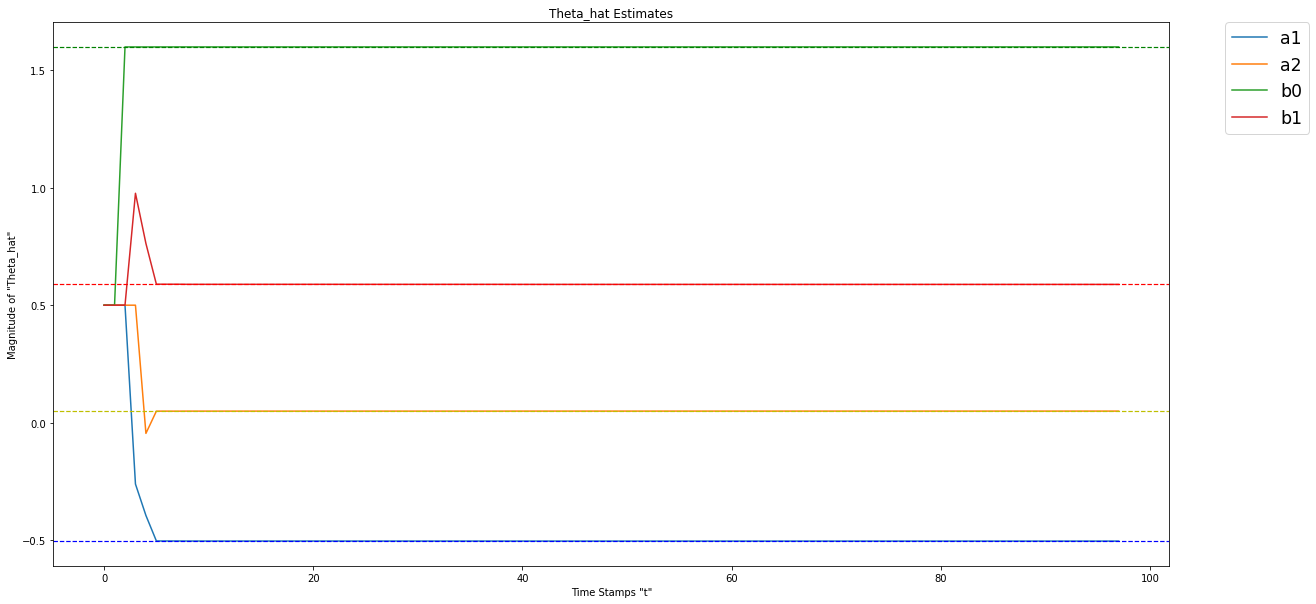

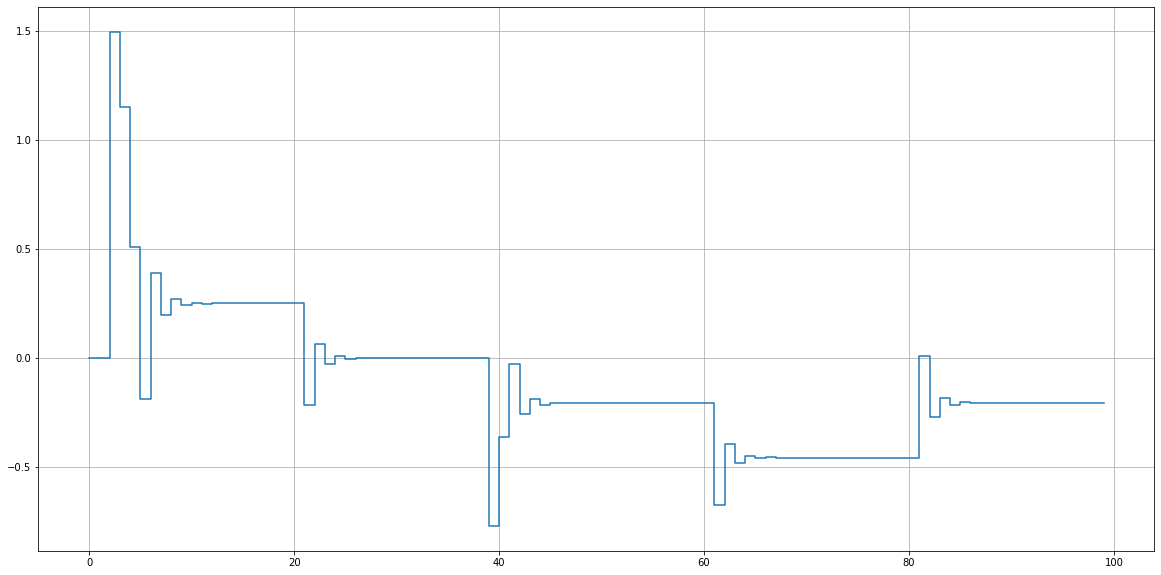

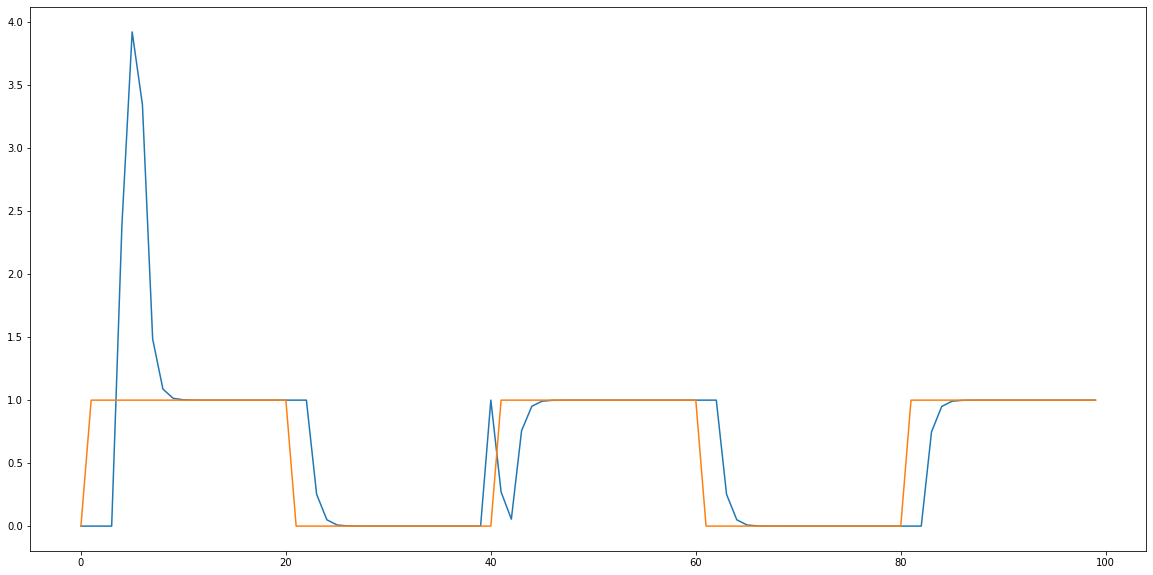

In [38]:
# Tunable components vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
sample_depth = 100
starting_samples = 3

# starting estimate for plant parameters
est = 0.5

lam = 1 # forgeting factor lambda

# true plant parameters
a_1 = -0.503215
a_2 = 0.0497871
b_0 = 1.59831
b_1 = 0.587984
theta0 = np.array([a_1, a_2, b_0, b_1]).reshape(-1,1)

# Tunable components ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

theta_hat = [np.array([est]*len(theta0)).reshape(-1,1)]

# model parameters
a_m1 = -0.2707
a_m2 = 0.01832

uk_subd = uk.subs([(am1, a_m1), (am2, a_m2)])
uk_func = sp.lambdify([u_k_1, u_k_2, uc_k_1, y_k, y_k_1, y_k_2,
                       a1, a2, b0, b1], uk_subd)

sample_range = range(sample_depth)
t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi/20)<=0 for i in sample_range])] = 0

dist = np.zeros(sample_depth)
dist[np.where([t[i]>= 40 for i in sample_range])] = 1

y = [0]*starting_samples
u = [0]*starting_samples

yf = [0]*starting_samples
uf = [0]*starting_samples

I = np.identity(len(theta0))
p = 1000*I 
    
for k in range(starting_samples ,sample_depth):
    phi = np.array([-yf[-1], -yf[-2], uf[-1], uf[-2]]).reshape(-1,1)
    
#     y.append(np.reshape(phi.T@theta0, ()))
    yf.append(np.reshape(phi.T@theta0 + dist[k] - dist[k-1], ()))
    
    K = p@phi@inv(lam + phi.T@p@phi)
    p = (I - K@phi.T)@p/lam
    
#     theta_hat.append(theta_hat[-1] + K*(y[k] - phi.T@theta_hat[-1]))
    theta_hat.append(theta_hat[-1] + K*(yf[k] - phi.T@theta_hat[-1]))
    
    y.append(yf[k] + y[k-1])
      
    u.append(np.reshape(uk_func(u[k-1], u[k-2], u_c[k-1], y[k], y[k-1], y[k-2], 
                                theta_hat[-1][0], theta_hat[-1][1], 
                                theta_hat[-1][2], theta_hat[-1][3]), ()))
    
    uf.append(u[k] - u[k-1])
    
df_theta = pd.DataFrame(np.asarray(theta_hat).reshape(-1,4,), columns=['a1', 'a2', 'b0', 'b1'])

theta_hat_ploter(df_theta, theta0, 'Theta_hat Estimates')

plt.step(t, u)
plt.grid()
plt.show()
    
plt.plot(t, y)
plt.plot(t, u_c)


# Problem 3

In [39]:
r1, t0 = sp.symbols('r_1 t_0')

A = q**2 + a1*q + a2
B = b0*q + b1
B_minus = b0
B_plus = simplify(B/B_minus)
H = B/A
A0 = 1

S = s0*q + s1
R = q + r1 # define b1/b0 as r1
R_prime = 1
T = q*t0 # t0 = (am1 + am2 + 1)/b0

## Part 1

$H = \;${{H}}

$B = B^{-}B^{+} = \;$({{B_minus}})({{B_plus}})

Therfore,

$$Deg(B^-) = 0$$

and 

$$Deg(B^+) = Deg(B) = Deg(B_m) = 1$$

Additionally

$$Deg(A) = Deg(A_m) = 2$$

$$Deg(S) = Deg(R) = Deg(A) - 1 = 2 - 1 = 1$$

$$Deg(R^{'}) = Deg(R) - Deg(B^+) = 1 - 1 = 0$$

$$Deg(A_0) = Deg(A) + Deg(R^{'}) - Deg(A_m) = 2 + 0 - 2 = 0$$

The control polynomials become

$A_0 =\;${{A0}}

$S =\;${{S}}

$R =\;${{R}}

$R^{'} =\;${{R_prime}}

$A_m =\;${{Am}}

Additionally, to achive unity gain, the final value theorem can implemented on $A_m$ to obtain the value of $B_m$. This is achived by the equation $B_m = A_m(1)q^m$.This way, when k goes to infinity ($q \rightarrow 1$), $G_m = 1$ and $Deg(B_m) = Deg(B)$. Therfore,

$B_m =\;${{Bm}}

From this result, $T$ can be calculated

$T =\;${{T}} 

## Output Equation

In [40]:
coef_1 = R*B_minus/Am
coef_2 = S*B_minus/Am

coef_1_ = (R*B_minus).subs(q, q**(-1))
coef_2_ = (S*B_minus).subs(q, q**(-1))

The diophantine equation can be manipulated to give a formula for the output and subsequently, the measurment model. 

$AR^{'} + B^{-}S = A_0A_m$

Multiplying both sides of the equation gives

$AR^{'}y(t) + B^{-}Sy(t) = A_0A_my(t)$

Since $Ay(t) = Bu(t)$ the above equation becomes

$R^{'}Bu(t) + B^{-}Sy(t) = A_0A_my(t)$

Isolating $y(t)$ on the right hand side of the equation gives

$y(t) = \frac{1}{A_oA_m}[R^{'}Bu(t) + B^{-}Sy(t)]$

Since $R^{'}B = R^{'}B^{-}B^+ = RB^{-}$ the above equation becomes

$y(t) = \frac{1}{A_oA_m}[RB^{-}u(t) + B^{-}Sy(t)]$

Substituting $A_o, A_m, R, B^{-}$ and $S$ with their polynomilas gives

$y(t) =\;$ {{coef_1}}$u(t) + \;$ {{coef_2}}$y(t)$


Noting that the numerator of both coefficients will have to be shifted by 2, considering the order of the denominator, we can rewrite the above equation as

$y(t) = \; b_0(q^{-1} + r_1q^{-2})u_f(t) + b_0(s_0q^{-1} + s_1q^{-2})y_f(t)$

Where $u_f(t)$ and $y_f(t)$ are ther filtered input and output respectivley. Expanding the above equation gives

$y(t) = \; b_0u_f(t-1) + b_0r_1u_f(t-2) + b_0s_0y_f(t-1) + b_0s_1y_f(t-2)$

For simplicity, let $b_0r_r = r_1^{'},\;b_0s_0 = s_0^{'}$ and $b_0s_1 = s_1^{'}$. The above equation becomes

$y(t) = \; b_0u_f(t-1) + r_1^{'}u_f(t-2) + s_0^{'}y_f(t-1) + s_1^{'}y_f(t-2)$

Therefore, 

$y(t) = \phi^T\theta = [u_f(t-1),\;  u_f(t-2),\;  y_f(t-1),\;  y_f(t-2)][b_0,\; r_1^{'},\; s_0^{'},\; s_1^{'}]^T$

The equation for $u_f(t)$ is given by

$u_f(t) = \frac{1}{A_m(q^{-1})A_0(q^{-1})}u(t) = \frac{1}{1 + a_{m1}q^{-1} + a_{m2}q^{-2}}u(t)$

This can then be rearanged to give 

$u_f(t) = -a_{m1}u_f(t-1) - a_{m2}u_f(t-2) + u(t)$

Similarly, the difference equation for the filtered output $y_f(t)$ is given by

$y_f(t) = \frac{1}{1 + a_{m1}q^{-1} + a_{m2}q^{-2}}y(t) = -a_{m1}y_f(t-1) - a_{m2}y_f(t-2) + y(t)$

## Control Law Equation

In [41]:
TR = simplify(T/R)
SR = simplify(S/R)

obj_TR = numden_coeff(TR, q)
obj_SR = numden_coeff(SR, q)

aTR = obj_TR.lst_denum_coeff
bTR = obj_TR.lst_num_coeff

aSR = obj_SR.lst_denum_coeff
bSR = obj_SR.lst_num_coeff

For $\frac{T}{R}$, the coefficients of the numerator and denominator are

$\alpha\frac{T}{R} =\;$ {{aTR}} 

and

$\beta\frac{T}{R} =\;$ {{bTR}}

while the coefficients of the numerator and denominator for $\frac{S}{R}$ are

$\alpha\frac{S}{R} =\;$ {{aSR}}

and

$\beta\frac{S}{R} =\;$ {{bSR}}

In [42]:
u_k, u_k_1, uc_k, y_k, y_k_1, y_k_2 = sp.symbols('u(k) u(k-1) u_{c}(k) y(k) y(k-1) y(k-2)')

uk = -u_k_1*aTR[1] + uc_k*bTR[0] - y_k*bSR[0] - y_k_1*bSR[1]
uk

-r₁⋅u(k-1) - s₀⋅y(k) - s₁⋅y(k-1) + t₀⋅u_{c}(k)

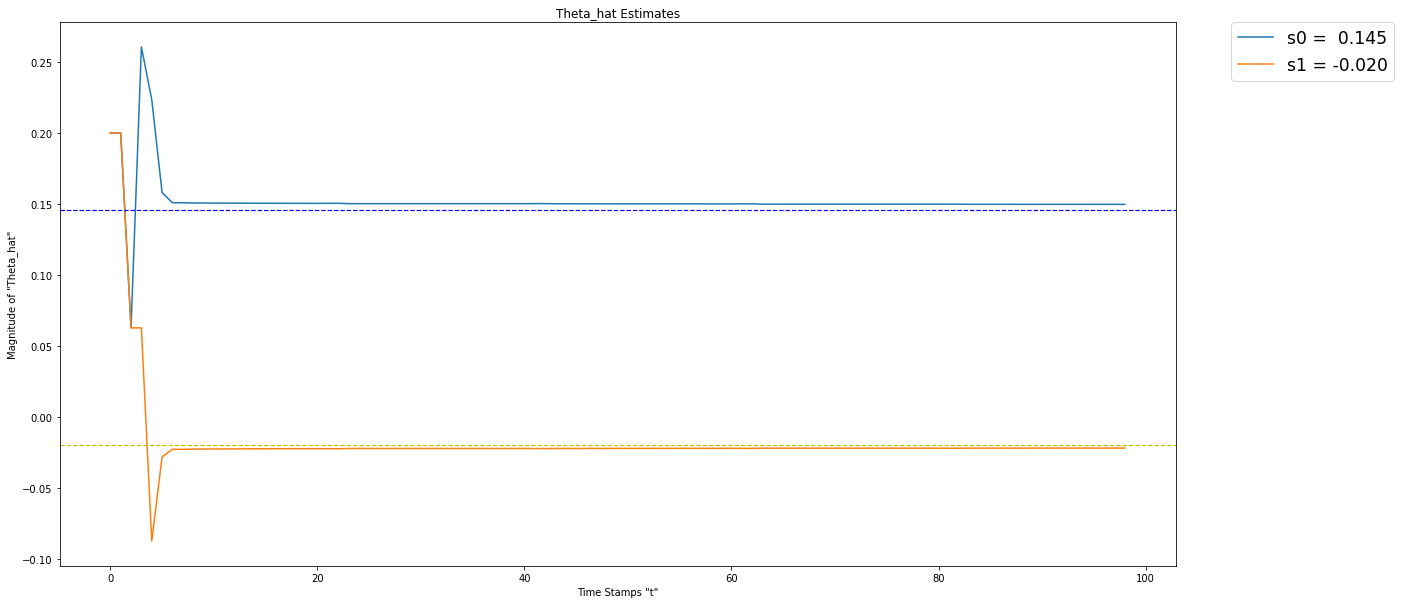

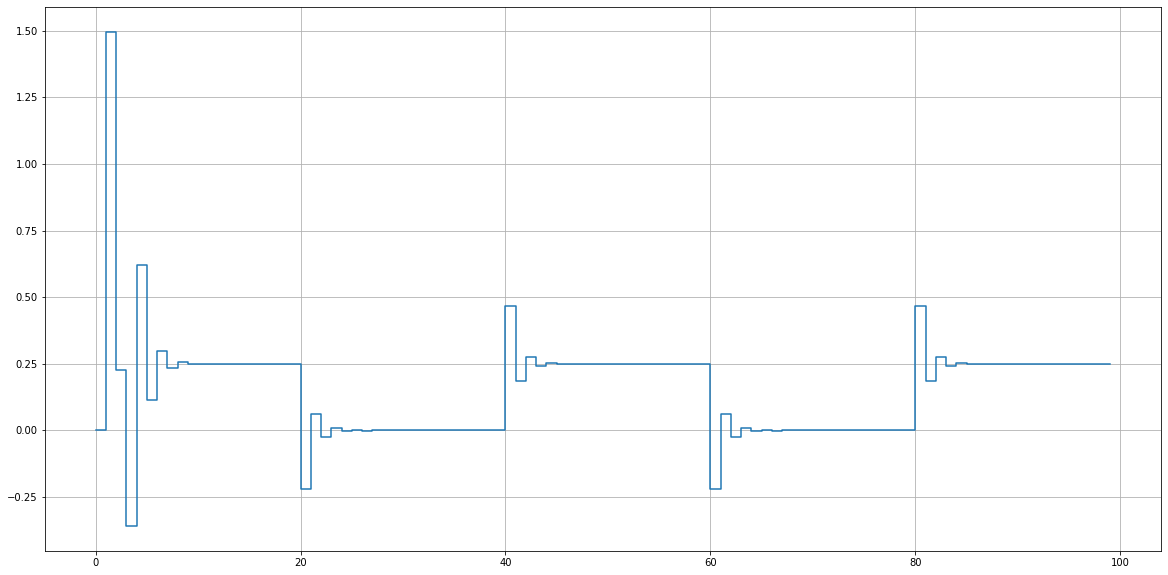

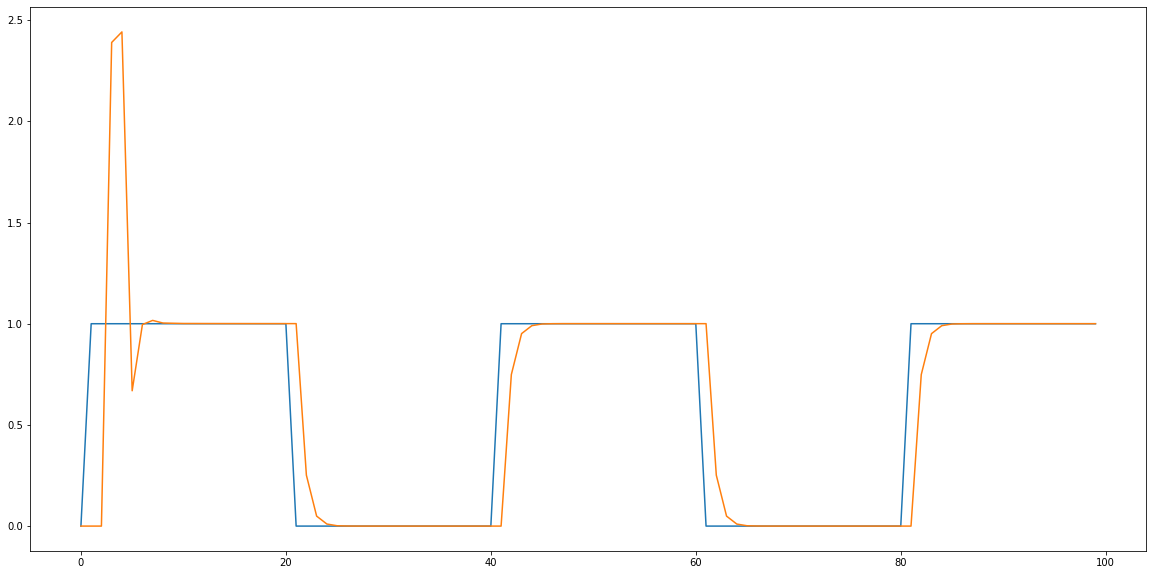

In [43]:
# Tunable components vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
sample_depth = 100
starting_samples = 2

# starting estimate for plant parameters
est = 0.1
est_offset = 5

lam = 1 # forgeting factor lambda

# model parameters
a_m1 = -0.2707
a_m2 = 0.01832

# true plant parameters
a_1 = -0.503215
a_2 = 0.0497871
b_0 = 1.59831
b_1 = 0.587984

r_1_p = b_1
s_0_p = (-a_1 + a_m1)
s_1_p = (-a_2 + a_m2)

theta0 = np.array([b_0, r_1_p, s_0_p, s_1_p]).reshape(-1,1)

# Tunable components ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

theta_hat = [np.array([est]*len(theta0)).reshape(-1,1)]
theta_hat[0][0] = est*est_offset
# theta_hat = [np.array([1,0.1,0.1,0.1]).reshape(-1,1)]

uk_subd = uk.subs([(am1, a_m1), (am2, a_m2)])
uk_func = sp.lambdify([u_k_1, uc_k, y_k, y_k_1, r1, s0, s1, t0], uk_subd)

sample_range = range(sample_depth)
t = [i for i in sample_range]
u_c = np.ones(sample_depth)
u_c[np.where([m.sin(t[i]*m.pi/20)<=0 for i in sample_range])] = 0

y = [0]*starting_samples
u = [0]*starting_samples

yf = [0]*starting_samples
uf = [0]*starting_samples


I = np.eye(len(theta0))
p = 100*I 
    
for k in range(starting_samples ,sample_depth):
    phi = np.array([uf[-1], uf[-2], yf[-1], yf[-2]]).reshape(-1,1)
    
    y.append(np.reshape(phi.T@theta0, ()))
    K = p@phi@inv(np.array(lam + phi.T@p@phi))
    theta_hat.append(theta_hat[-1] + K*(y[k] - phi.T@theta_hat[-1]))
    p = (I - K@phi.T)@p/lam
    
    
    r_1 = theta_hat[-1][1]/theta_hat[-1][0]
    s_0 = theta_hat[-1][2]/theta_hat[-1][0]
    s_1 = theta_hat[-1][3]/theta_hat[-1][0]
    t_0 = (a_m1 + a_m2 + 1)/theta_hat[-1][0]
    
    u.append(np.reshape(uk_func(u[k-1], u_c[k], y[k], y[k-1], 
                                r_1, s_0, s_1, t_0), ()))
    
    uf.append(-a_m1*uf[k-1] - a_m2*uf[k-2] + u[k])
    yf.append(-a_m1*yf[k-1] - a_m2*yf[k-2] + y[k])
    
lst_cntrl_param = [theta_hat[i][-2::]/theta_hat[i][0] for i in range(len(theta_hat))]
df_theta = pd.DataFrame(np.asarray(lst_cntrl_param).reshape(-1,2,), 
                        columns=[f's0 = {s_0_p/b_0: .3f}', f's1 = {s_1_p/b_0: .3f}'])

theta_hat_ploter(df_theta, theta0[-2::]/theta0[0], 'Theta_hat Estimates')

plt.step(t, u)
plt.grid()
plt.show()

plt.plot(t, u_c)
plt.plot(t, y)

In [44]:
theta_hat[2]

array([[1.59341937],
       [0.1       ],
       [0.1       ],
       [0.1       ]])